<a href="https://colab.research.google.com/github/BasselKhalid/Thesis/blob/main/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline

from IPython.display import display

sns.set(style="whitegrid")
%matplotlib inline

# Upload if running in Colab
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv("shopping_trends.csv")


Saving shopping_trends.csv to shopping_trends.csv


Data Inspection and Cleaning:

 Step 1: Initial Inspection

In [2]:
# Show structure
print("🔎 Dataset Structure:")
print(df.info())

# Preview the data
print("\n📄 Data Preview:")
display(df.head())

# Check data types
print("\n🧾 Data Types:")
print(df.dtypes)

# Check for missing values
print("\n🚨 Missing Values:")
print(df.isnull().sum()[df.isnull().sum() > 0])


🔎 Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually



🧾 Data Types:
Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

🚨 Missing Values:
Series([], dtype: int64)


Step 2: Data Cleaning

In [3]:
# Drop identifier column if present
if 'Customer ID' in df.columns:
    df = df.drop(columns=["Customer ID"])

# Remove duplicate records
df = df.drop_duplicates()

# Report dataset shape after cleaning
print(f"\n✅ Dataset shape after cleaning: {df.shape}")



✅ Dataset shape after cleaning: (3900, 18)


Step 3: Descriptive Summary

In [4]:
# Numerical summary
print("\n📊 Descriptive Statistics (Numerical):")
display(df.describe())

# Categorical summary
print("\n🗂️ Unique values in categorical features:")
categorical_features = df.select_dtypes(include='object').columns.tolist()
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")



📊 Descriptive Statistics (Numerical):


,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000



🗂️ Unique values in categorical features:
Gender: 2 unique values
Item Purchased: 25 unique values
Category: 4 unique values
Location: 50 unique values
Size: 4 unique values
Color: 25 unique values
Season: 4 unique values
Subscription Status: 2 unique values
Payment Method: 6 unique values
Shipping Type: 6 unique values
Discount Applied: 2 unique values
Promo Code Used: 2 unique values
Preferred Payment Method: 6 unique values
Frequency of Purchases: 7 unique values


Exploratory Data Analysis (EDA)

Q1: What is the gender distribution of customers?

<ipython-input-5-b2c86b7c1e80>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="pastel")


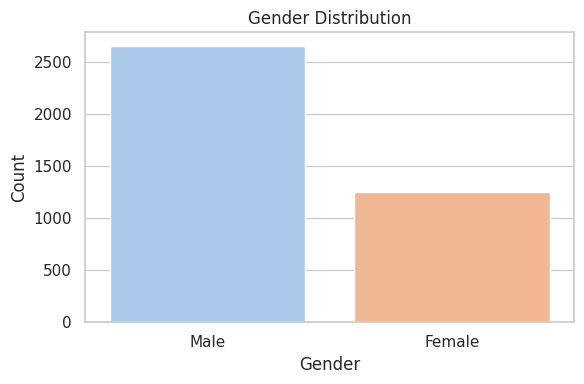

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=df, palette="pastel")
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Q2: Which product categories are most frequently purchased?

<ipython-input-6-36ff278943f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Category", data=df, order=order, palette="coolwarm")


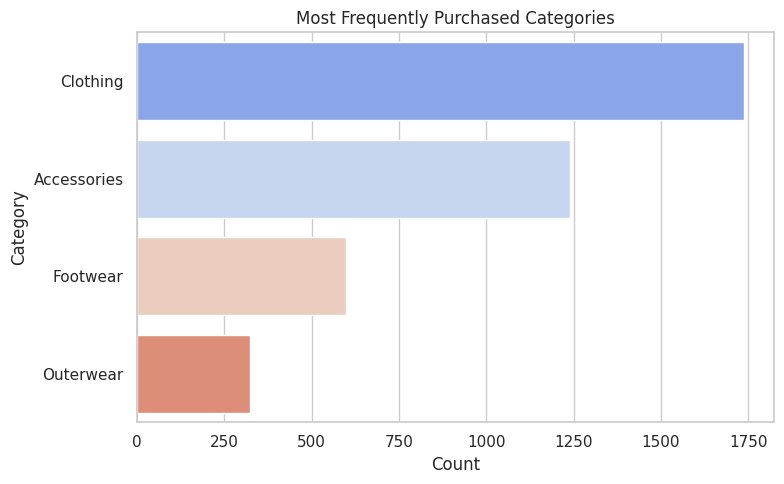

In [6]:
plt.figure(figsize=(8, 5))
order = df["Category"].value_counts().index
sns.countplot(y="Category", data=df, order=order, palette="coolwarm")
plt.title("Most Frequently Purchased Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


Q3: What is the most active shopping season?

<ipython-input-7-1afaadaab064>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Season", data=df, order=["Winter", "Spring", "Summer", "Fall"], palette="Set2")


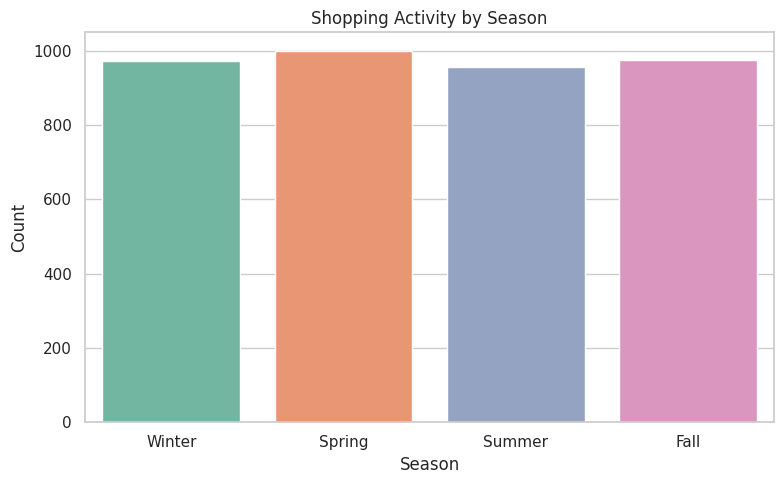

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Season", data=df, order=["Winter", "Spring", "Summer", "Fall"], palette="Set2")
plt.title("Shopping Activity by Season")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



Q4: What is the distribution of purchase amounts?


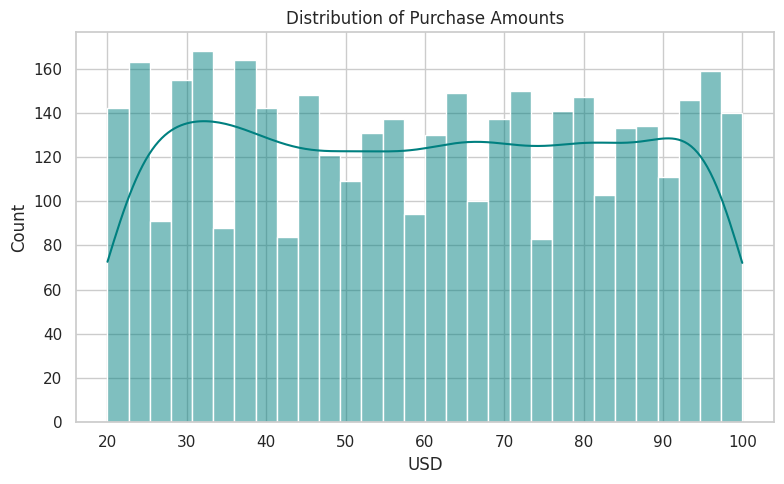

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Purchase Amount (USD)"], kde=True, bins=30, color='teal')
plt.title("Distribution of Purchase Amounts")
plt.xlabel("USD")
plt.tight_layout()
plt.show()


Q5: What is the relationship between Age and Purchase Amount?

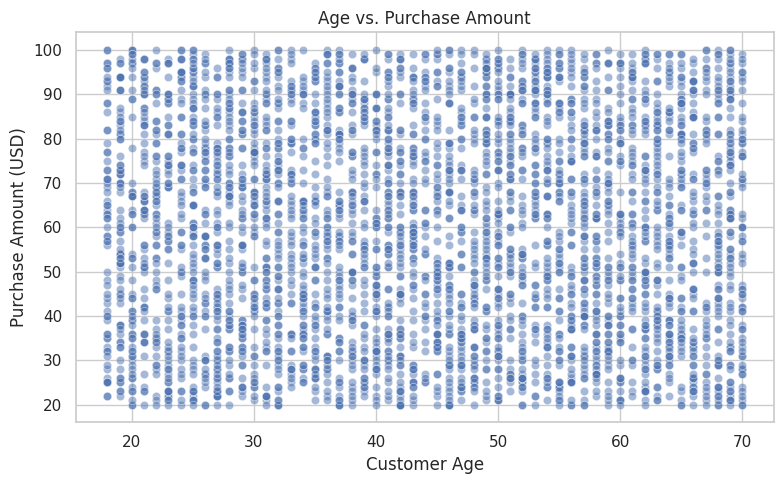

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Age", y="Purchase Amount (USD)", data=df, alpha=0.5)
plt.title("Age vs. Purchase Amount")
plt.xlabel("Customer Age")
plt.ylabel("Purchase Amount (USD)")
plt.tight_layout()
plt.show()


Q6: Which shipping types are most preferred?

<ipython-input-10-33404208834f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Shipping Type", data=df, palette="pastel", order=df["Shipping Type"].value_counts().index)


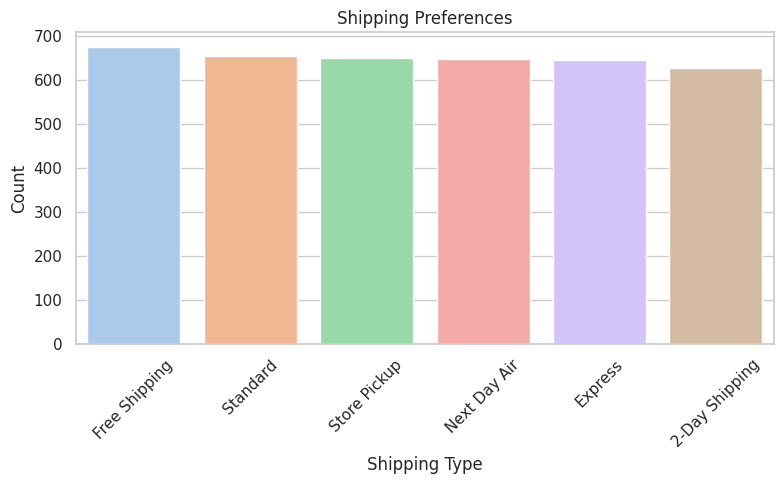

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Shipping Type", data=df, palette="pastel", order=df["Shipping Type"].value_counts().index)
plt.title("Shipping Preferences")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q7: Frequency of Purchases - How often do customers shop?

<ipython-input-11-f0d043d79ea5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Frequency of Purchases", data=df, order=df["Frequency of Purchases"].value_counts().index, palette="Blues")


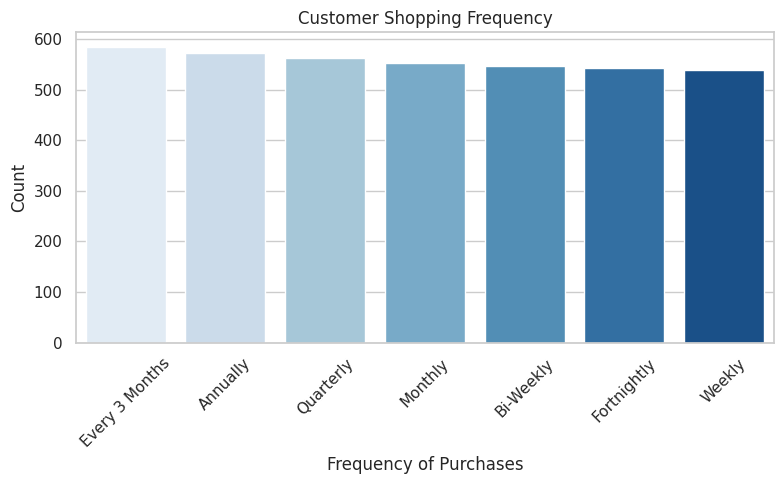

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Frequency of Purchases", data=df, order=df["Frequency of Purchases"].value_counts().index, palette="Blues")
plt.title("Customer Shopping Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Feature Engineering & Encoding

Step 1: Identify Numerical and Categorical Features

In [12]:
# Identify types
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

print("📌 Numerical Features:", numerical_features)
print("📌 Categorical Features:", categorical_features)


📌 Numerical Features: ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
📌 Categorical Features: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']


Step 2: One-Hot Encode Categorical Variables

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cats = pd.DataFrame(
    encoder.fit_transform(df[categorical_features]),
    columns=encoder.get_feature_names_out(categorical_features),
    index=df.index
)

# Combine encoded categorical and numerical features
df_encoded = pd.concat([df[numerical_features], encoded_cats], axis=1)

print("✅ Encoded Dataset Shape:", df_encoded.shape)
display(df_encoded.head())


✅ Encoded Dataset Shape: (3900, 149)


,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,...,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,53,3.1,14,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,19,64,3.1,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,50,73,3.1,23,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21,90,3.5,49,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,45,49,2.7,31,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Data Preparation Pipelines for Clustering:

 Pipeline A: Mean Imputation + Min-Max Scaling

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

pipeline_a = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])

data_a = pipeline_a.fit_transform(df_encoded)


Pipeline B: kNN Imputation + Z-Score Normalization + PCA

In [15]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipeline_b = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5)),
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95))
])

data_b = pipeline_b.fit_transform(df_encoded)


Pipeline C: Z-Score Scaling + IQR Outlier Removal + Variance Threshold

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

# STEP 1: IQR Filtering on original numerical features (e.g., Age, Purchase Amount, etc.)
numerical_only = df[numerical_features]
scaler_temp = StandardScaler()
scaled_numerical = scaler_temp.fit_transform(numerical_only)

Q1 = np.percentile(scaled_numerical, 25, axis=0)
Q3 = np.percentile(scaled_numerical, 75, axis=0)
IQR = Q3 - Q1

# Outlier mask: Only remove rows that are outliers across numerical features
mask = ~((scaled_numerical < (Q1 - 1.5 * IQR)) | (scaled_numerical > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply mask to full encoded dataset
df_c_filtered = df_encoded[mask]
print("✅ Remaining rows after IQR filtering:", df_c_filtered.shape[0])

# STEP 2: Z-Score Scaling
scaler_c = StandardScaler()
data_c_scaled = scaler_c.fit_transform(df_c_filtered)

# STEP 3: Variance Threshold to drop low-information features
selector = VarianceThreshold(threshold=0.01)
data_c = selector.fit_transform(data_c_scaled)

print("✅ Final shape of Pipeline C data:", data_c.shape)



✅ Remaining rows after IQR filtering: 3900
✅ Final shape of Pipeline C data: (3900, 149)


 Pipeline D: Mode Imputation + Robust Scaling + PCA

In [19]:
from sklearn.preprocessing import RobustScaler

imputer_d = SimpleImputer(strategy="most_frequent")
data_d_imputed = imputer_d.fit_transform(df_encoded)
data_d_scaled = RobustScaler().fit_transform(data_d_imputed)
data_d = PCA(n_components=0.95).fit_transform(data_d_scaled)


Apply K-Means (k=5) to All Pipelines

In [20]:
from sklearn.cluster import KMeans

# Apply K-Means to each dataset
kmeans_a = KMeans(n_clusters=5, random_state=42, n_init=10).fit(data_a)
kmeans_b = KMeans(n_clusters=5, random_state=42, n_init=10).fit(data_b)
kmeans_c = KMeans(n_clusters=5, random_state=42, n_init=10).fit(data_c)
kmeans_d = KMeans(n_clusters=5, random_state=42, n_init=10).fit(data_d)

# Cluster labels
labels_a = kmeans_a.labels_
labels_b = kmeans_b.labels_
labels_c = kmeans_c.labels_
labels_d = kmeans_d.labels_


Model Evaluation

,Pipeline,Silhouette Score,Inertia,Davies–Bouldin Index,Calinski–Harabasz Score
0,Pipeline A,0.0451,33415.7410,4.2343,220.8482
1,Pipeline B,0.0242,514844.5382,6.1261,74.5932
2,Pipeline C,0.0279,540486.6161,5.0996,73.1698
3,Pipeline D,0.0869,34972.4106,3.2221,500.3585


<ipython-input-21-5a48cb9ebeee>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Pipeline", y="Silhouette Score", palette="crest")


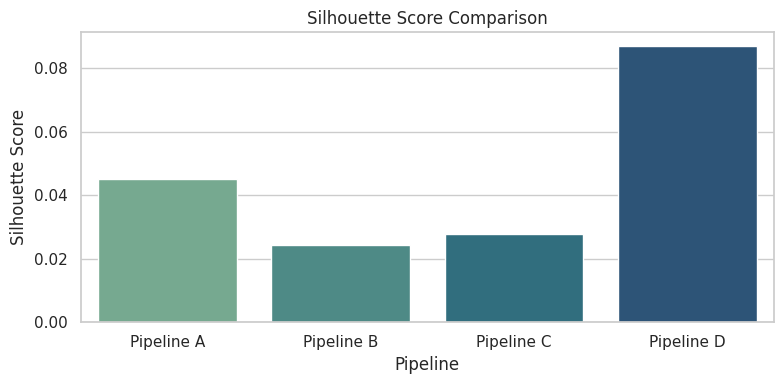

<ipython-input-21-5a48cb9ebeee>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Pipeline", y="Inertia", palette="flare")


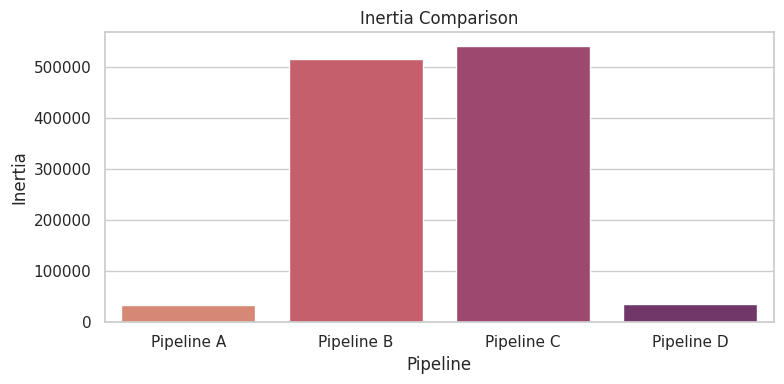

<ipython-input-21-5a48cb9ebeee>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Pipeline", y="Davies–Bouldin Index", palette="mako")


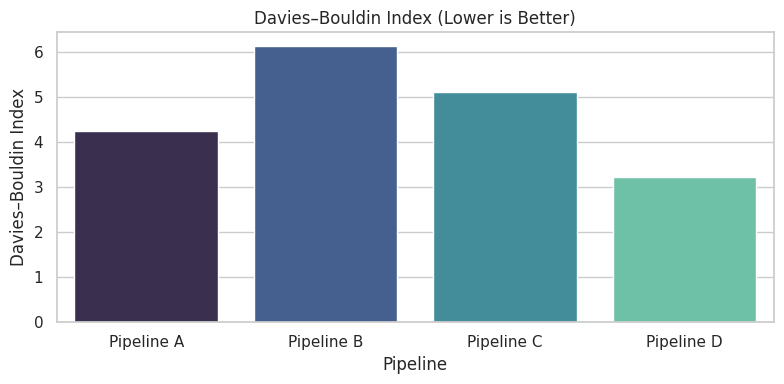

<ipython-input-21-5a48cb9ebeee>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Pipeline", y="Calinski–Harabasz Score", palette="viridis")


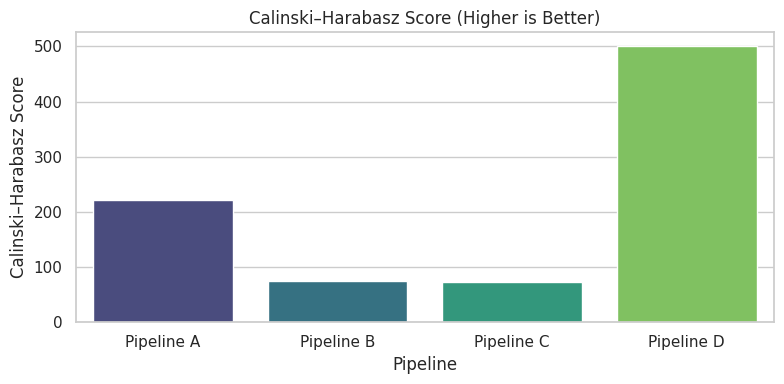

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender,Category,Season,Subscription Status,Shipping Type
Cluster,,,,,,,,,
0,44.2,61.5,3.8,24.4,Female,Clothing,Fall,No,Next Day Air
1,43.8,59.5,3.8,26.2,Male,Clothing,Winter,No,Store Pickup
2,44.7,61.6,3.7,25.9,Male,Clothing,Fall,Yes,Standard
3,44.1,59.8,3.7,24.6,Female,Clothing,Spring,No,Free Shipping
4,44.0,58.6,3.8,25.7,Male,Clothing,Spring,Yes,Next Day Air


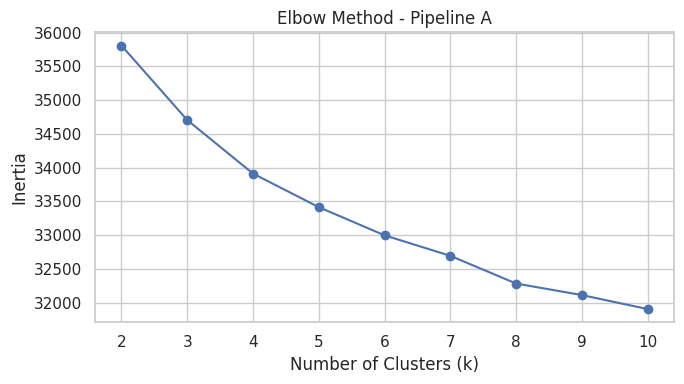

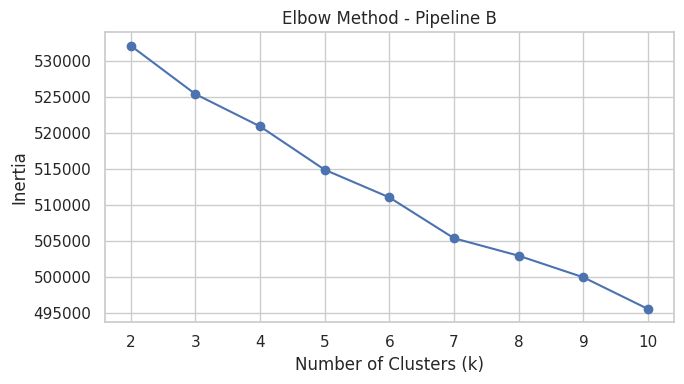

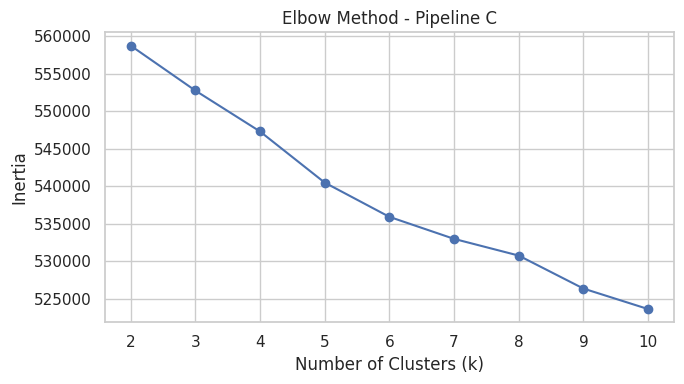

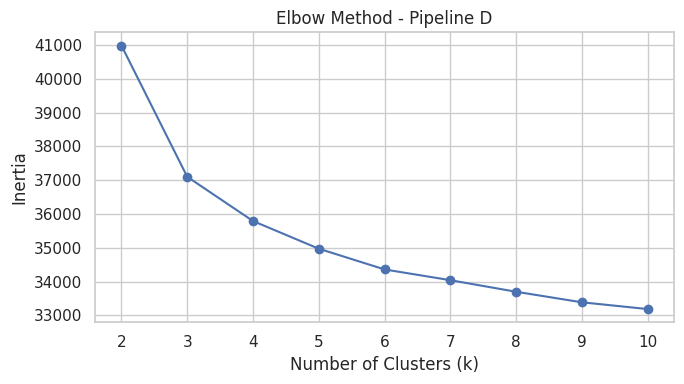

In [21]:
# 📈 Model Evaluation: Clustering Performance & Interpretability

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Step 1: Evaluation Scores ---
results = []

for name, data, labels in zip(
    ["A", "B", "C", "D"],
    [data_a, data_b, data_c, data_d],
    [labels_a, labels_b, labels_c, labels_d]
):
    silhouette = silhouette_score(data, labels)
    inertia = KMeans(n_clusters=5, random_state=42, n_init=10).fit(data).inertia_
    dbi = davies_bouldin_score(data, labels)
    ch = calinski_harabasz_score(data, labels)

    results.append({
        "Pipeline": f"Pipeline {name}",
        "Silhouette Score": silhouette,
        "Inertia": inertia,
        "Davies–Bouldin Index": dbi,
        "Calinski–Harabasz Score": ch
    })

summary_df = pd.DataFrame(results).round(4)
display(summary_df)

# --- Step 2: Visualize Scores ---
plt.figure(figsize=(8, 4))
sns.barplot(data=summary_df, x="Pipeline", y="Silhouette Score", palette="crest")
plt.title("Silhouette Score Comparison")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=summary_df, x="Pipeline", y="Inertia", palette="flare")
plt.title("Inertia Comparison")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=summary_df, x="Pipeline", y="Davies–Bouldin Index", palette="mako")
plt.title("Davies–Bouldin Index (Lower is Better)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=summary_df, x="Pipeline", y="Calinski–Harabasz Score", palette="viridis")
plt.title("Calinski–Harabasz Score (Higher is Better)")
plt.tight_layout()
plt.show()

# --- Step 3: Cluster Profiling (Pipeline D as example) ---
df_clusters = df.copy()
df_clusters["Cluster"] = labels_d

num_profile = df_clusters.groupby("Cluster")[
    ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]
].mean().round(1)

cat_profile = df_clusters.groupby("Cluster")[
    ["Gender", "Category", "Season", "Subscription Status", "Shipping Type"]
].agg(lambda x: x.value_counts().index[0])

cluster_profile = pd.concat([num_profile, cat_profile], axis=1)
display(cluster_profile)

# --- Step 4: Elbow Method ---
def plot_elbow(data, title):
    inertias = []
    ks = range(2, 11)
    for k in ks:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        km.fit(data)
        inertias.append(km.inertia_)

    plt.figure(figsize=(7, 4))
    plt.plot(ks, inertias, marker='o')
    plt.title(f"Elbow Method - {title}")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.xticks(ks)
    plt.tight_layout()
    plt.show()

plot_elbow(data_a, "Pipeline A")
plot_elbow(data_b, "Pipeline B")
plot_elbow(data_c, "Pipeline C")
plot_elbow(data_d, "Pipeline D")
